# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | monahans
Processing Record 8 of Set 1 | kuressaare
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | 'amran
City not found. Skipping...
Processing Record 19 of Set 1 | radashkovichy
Processing Record 20 of Set 1 | peniche
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | tralee
Proce

City not found. Skipping...
Processing Record 36 of Set 4 | cadale
Processing Record 37 of Set 4 | binhe
Processing Record 38 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 39 of Set 4 | kamyzyak
Processing Record 40 of Set 4 | wenshui
Processing Record 41 of Set 4 | kralendijk
Processing Record 42 of Set 4 | kongsvinger
Processing Record 43 of Set 4 | sao tome
Processing Record 44 of Set 4 | oum hadjer
Processing Record 45 of Set 4 | brazzaville
Processing Record 46 of Set 4 | samarinda
Processing Record 47 of Set 4 | galliano
Processing Record 48 of Set 4 | magadan
Processing Record 49 of Set 4 | heringen
Processing Record 0 of Set 5 | pathein
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | taupo
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | peruibe
Processing Record 5 of Set 5 | chonchi
Processing Record 6 of Set 5 | ochobo
Processing Record 7 of Set 5 | les anglais
Processing Record 8 of Set 5 | pisco
Processing R

Processing Record 32 of Set 8 | yarmouth
Processing Record 33 of Set 8 | odienne
Processing Record 34 of Set 8 | soio
Processing Record 35 of Set 8 | san pedro
Processing Record 36 of Set 8 | fisterra
Processing Record 37 of Set 8 | namdrik
Processing Record 38 of Set 8 | calvinia
Processing Record 39 of Set 8 | hilo
Processing Record 40 of Set 8 | kerikeri
Processing Record 41 of Set 8 | selibaby
Processing Record 42 of Set 8 | khanty-mansiysk
Processing Record 43 of Set 8 | hithadhoo
Processing Record 44 of Set 8 | mount pearl
Processing Record 45 of Set 8 | porto murtinho
Processing Record 46 of Set 8 | xinyuan
Processing Record 47 of Set 8 | grand gaube
Processing Record 48 of Set 8 | leava
Processing Record 49 of Set 8 | itaituba
Processing Record 0 of Set 9 | taoudenni
Processing Record 1 of Set 9 | freeport
Processing Record 2 of Set 9 | jiuquan
Processing Record 3 of Set 9 | vilhena
Processing Record 4 of Set 9 | saudarkrokur
Processing Record 5 of Set 9 | mana
Processing Recor

Processing Record 20 of Set 12 | lotoshino
Processing Record 21 of Set 12 | gudur
Processing Record 22 of Set 12 | lubango
Processing Record 23 of Set 12 | roma
Processing Record 24 of Set 12 | hami
Processing Record 25 of Set 12 | santa cruz
Processing Record 26 of Set 12 | delijan
Processing Record 27 of Set 12 | bullsbrook
Processing Record 28 of Set 12 | reyes
Processing Record 29 of Set 12 | rethymno
Processing Record 30 of Set 12 | pauini
Processing Record 31 of Set 12 | aswan
Processing Record 32 of Set 12 | shizunai-furukawacho
Processing Record 33 of Set 12 | rio san juan
Processing Record 34 of Set 12 | itarantim
Processing Record 35 of Set 12 | pont rouge
Processing Record 36 of Set 12 | el dorado
Processing Record 37 of Set 12 | freistadt
Processing Record 38 of Set 12 | barcelos
Processing Record 39 of Set 12 | tevragh zeina
City not found. Skipping...
Processing Record 40 of Set 12 | isla del bosque
Processing Record 41 of Set 12 | shenjiamen
Processing Record 42 of Set 1

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.61,78,62,10.28,TF,1702249718
1,saipan,15.1355,145.7010,28.39,78,20,6.17,MP,1702249462
2,nemuro,43.3236,145.5750,-1.38,52,18,4.26,JP,1702249719
3,ribeira grande,38.5167,-28.7000,17.65,78,54,9.39,PT,1702249719
4,namibe,-15.1961,12.1522,22.53,76,82,2.27,AO,1702249719


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.61,78,62,10.28,TF,1702249718
1,saipan,15.1355,145.7010,28.39,78,20,6.17,MP,1702249462
2,nemuro,43.3236,145.5750,-1.38,52,18,4.26,JP,1702249719
3,ribeira grande,38.5167,-28.7000,17.65,78,54,9.39,PT,1702249719
4,namibe,-15.1961,12.1522,22.53,76,82,2.27,AO,1702249719


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

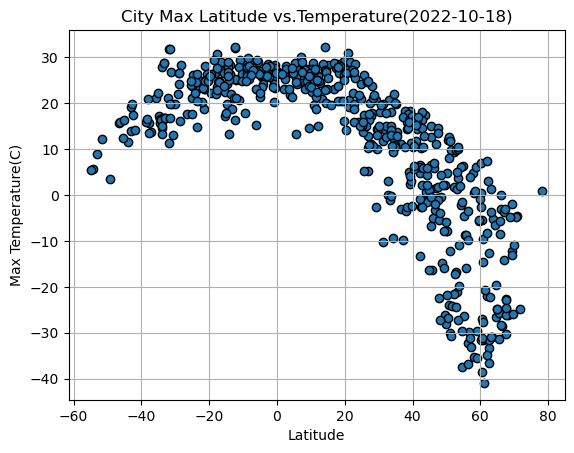

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs.Temperature(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

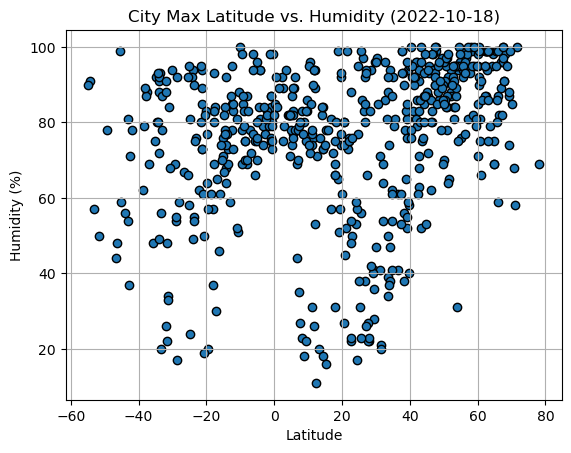

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

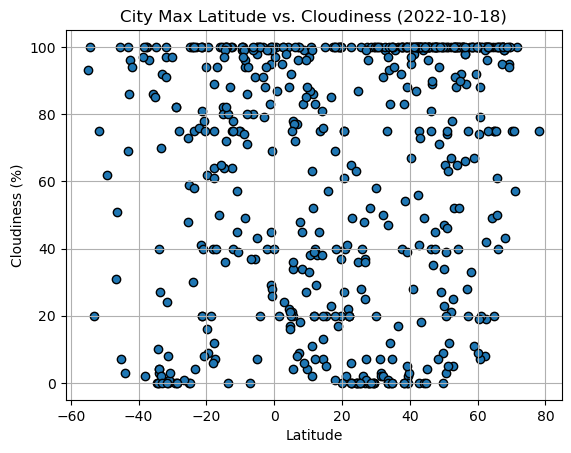

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

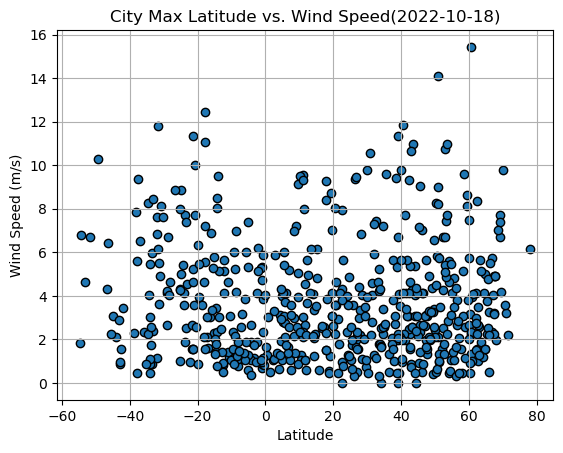

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,28.39,78,20,6.17,MP,1702249462
2,nemuro,43.3236,145.5750,-1.38,52,18,4.26,JP,1702249719
3,ribeira grande,38.5167,-28.7000,17.65,78,54,9.39,PT,1702249719
6,monahans,31.5943,-102.8926,14.38,21,3,4.59,US,1702249719
7,kuressaare,58.2481,22.5039,0.53,99,100,5.14,EE,1702249719


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.61,78,62,10.28,TF,1702249718
4,namibe,-15.1961,12.1522,22.53,76,82,2.27,AO,1702249719
5,papatowai,-46.5619,169.4708,15.70,44,31,4.30,NZ,1702249719
8,port mathurin,-19.6833,63.4167,26.07,77,62,3.66,MU,1702249720
9,grytviken,-54.2811,-36.5092,5.64,91,100,6.80,GS,1702249720


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6751186401996618


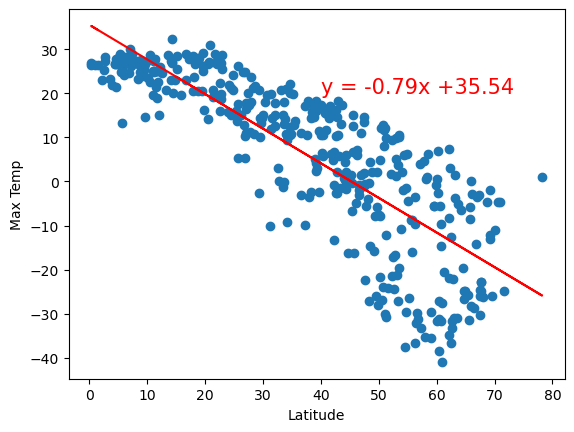

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.43555582232717416


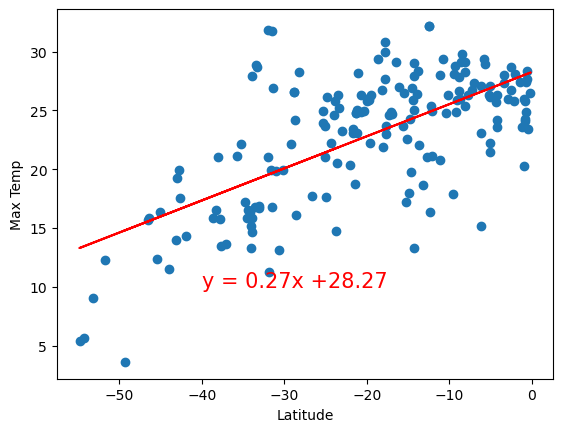

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** There is a strong correlation between maximum temperature and the latitudes for both north and south hemispheres. The rvalues of both hemispheres are close to 1.0. Other factors such as cloudiness, humidity and wind speed are not considered in this case.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13417815367685262


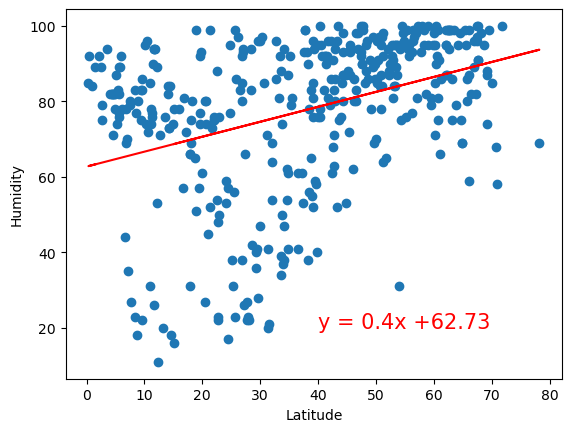

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0621548350763401


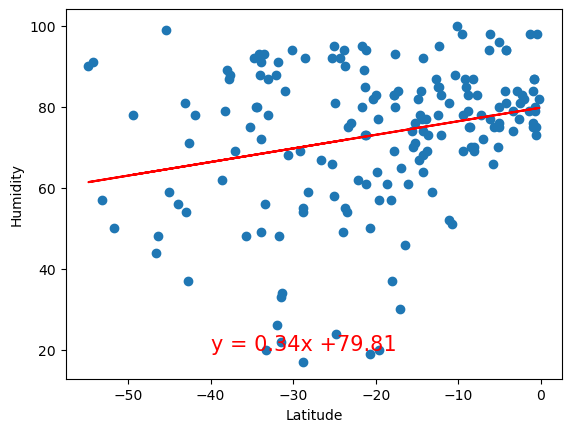

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between humidity and the latitude in the northern hemisphere. The correlation between the latitiude in the southern hemisphere and humidity is weak. Other factors such as cloudiness, temperature and wind speed are not considered in this case.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08401755697408259


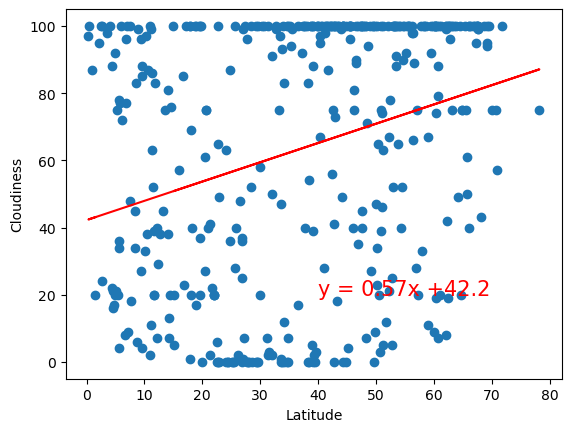

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.04964061634317844


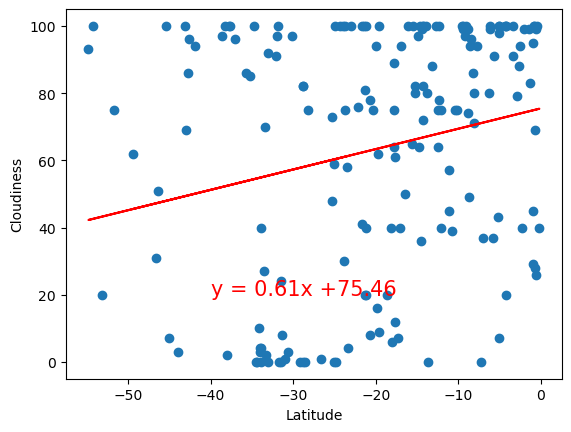

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between cloudiness and the latitude for the southern hemisphere. The correlation between latitude in the northern hemisphere and cloudiness is weak. Other factors such as temperature, humidity and wind speed are not considered in this case.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007457108923210649


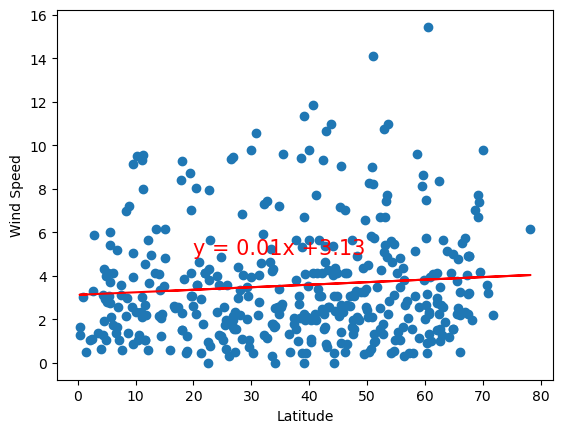

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.04906091071144818


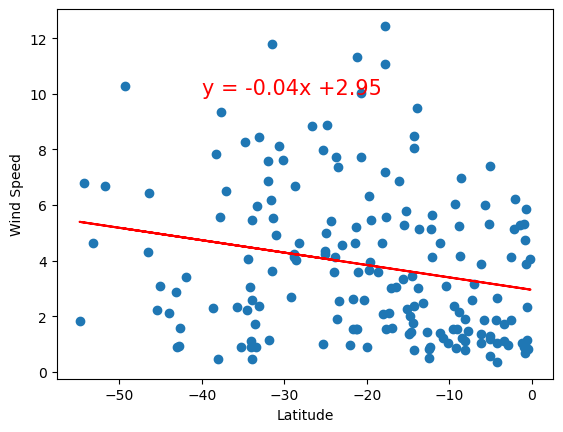

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and the latitude for both the northern and southern hemispheres. The rvalues are not close to 1.0. Other factors such as temperature, humidity and cloudiness are not considered in this case.